<a href="https://colab.research.google.com/github/fasmina-nasar/CreditCardFraudPrediction/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Neural Network with Tensorflow

Artificial Neural Network(ANN) is at the core of Deep Learning which is advanced version of Machine Learning technique. ANN consists of input & the output layer, the hidden layers, neurons under hidden layers, forward propagation, and backward propagation. The layers which recieves input forms input layers, the layer which signals its response out are the output layer and the layers lie in between input and output consists of Hidden layers.

Table of Contents

1. Introduction to Deep Learning
2. Brief note on ANN
3. The problem Statement
4. Dataset Description
5. Dataset Dictionary
6. Import Dependencies
7. Read the Dataset
8. Exploratory Data Analysis
9. Visualization of Data
10. Declare features & Target Variable
11. Preprocessing Dataset
12. Compile Model
13. Prediction & Accuracy of the Model
14. Results & Conclusion

## 1. Introduction to Deep Learning

Deep Learning is the sub division of Machine Learning which is essentially  neural networks with 3 or more layers. It imitates the working of human brain with the help of artificial neural networks which is similar to the networks of neurons in a human brain. It is called 'deep learning' because it makes use of deep neural networks - allowing to learn from large amounts of data. Deep Learning has many applications such as speech recognition, image recognition, self driving cars, medical diagnosis etc.

## 2. Brief note on ANN

Artificial Neural Networks (ANN) are multi-layer fully-connected neural networks. They consist of an input layer, multiple hidden layers, and an output layer. Every node in one layer is connected to every other node in the next layer. We make the network deeper by increasing the number of hidden layers.

## 3. The problem Statement

I have used a credit card fraud dataset for this project. In this project, geospatial plot is utilized to visualize the fraud rates across different states. Explored and analyzed the dataset to predict the fraudulent transactions and under which age group these transactions are more likely to occur. I implemented ANN model to predict if a transaction is suspicious based on various features in the dataset such as age, category, location, amount etc.

##4. Dataset Description

This dataset consists of credit card transactions in the western United States. This dataset is a binary classification problem and is taken from DataCamp's repo which consists of 14 features and a target column.

##5. Dataset Dictionary

merchant      : Merchant Name

category	    : Category of Merchant

amt	          : Amount of Transaction

city	        : City of Credit Card Holder

state	        : State of Credit Card Holder

lat	          : Latitude Location of Purchase

long	        : Longitude Location of Purchase

city_pop	    : Credit Card Holder's City Population

job	          : Job of Credit Card Holder

dob	          : Date of Birth of Credit Card Holder

trans_num	    : Transaction Number

merch_lat	    : Latitude Location of Merchant

merch_long	  : Longitude Location of Merchant

is_fraud	    : Whether Transaction is Fraud (1) or Not (0)

# 6. Import Dependencies

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from datetime import datetime
from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score, roc_curve, accuracy_score, precision_score, plot_roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD


import warnings
warnings.filterwarnings("ignore")

# 7. Read the Dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/credit_card_fraud.csv')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [ ]:
data.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0
339606,2020-12-31 23:59:24,Breitenberg LLC,travel,7.99,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0


# 8. Exploratory Data Analysis

Checking for null values 

In [ ]:
data.isnull().any()

trans_date_trans_time    False
merchant                 False
category                 False
amt                      False
city                     False
state                    False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

checking for duplicated values

In [ ]:
data.duplicated().sum()

0

Checking Unique values in each column by iteration

In [ ]:
for column in data:
  print('unique values in column',column,'are: ', data[column].unique())

unique values in column trans_date_trans_time are:  ['2019-01-01 00:00:44' '2019-01-01 00:00:51' '2019-01-01 00:07:27' ...
 '2020-12-31 23:59:07' '2020-12-31 23:59:15' '2020-12-31 23:59:24']
unique values in column merchant are:  ['Heller, Gutmann and Zieme' 'Lind-Buckridge' 'Kiehn Inc' 'Beier-Hyatt'
 'Bruen-Yost' 'Kunze Inc' 'Nitzsche, Kessler and Wol'
 'Kihn, Abernathy and Douglas' 'Ledner-Pfannerstill' 'Stracke-Lemke'
 'Cummerata-Jones' 'Huel-Langworth' 'Ferry, Lynch and Kautze'
 'Little, Gutmann and Lynch' 'Swaniawski, Lowe and Robel'
 'Reichert, Huels and Hoppe' 'Howe Lt' 'Wolf Inc' 'Vandervort-Funk'
 'Schaefer, McGlynn and Bosco' 'Fisher-Schowalte' 'Medhurst PLC'
 'Kerluke Inc' 'Bauch-Rayno' 'Hills-Olson' 'Durgan-Aue' 'Pacocha-Bauch'
 'Reilly, Heaney and Cole' 'Bradtke PLC' 'Zieme, Bode and Dooley'
 'Hills-Witting' 'Bernhard, Grant and Langworth' 'Lockman Lt' 'Harber Inc'
 'Kerluke, Kertzmann and Wiz' 'Johnston, Nikolaus and Maggio'
 'Torp-Labadie' 'Doyle Lt' 'McDermott-Rice' 'Sp

View summary of dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

Statistical summary of dataset

In [ ]:
data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


shape of the dataset

In [ ]:
data.shape

(339607, 15)

Number of unique values in corresponding features

In [ ]:
data.nunique()

trans_date_trans_time    338504
merchant                    693
category                     14
amt                       32112
city                        176
state                        13
lat                         183
long                        183
city_pop                    174
job                         163
dob                         187
trans_num                339607
merch_lat                335608
merch_long               337263
is_fraud                      2
dtype: int64

extract data of non-frauds from dataframe 



In [ ]:
not_fraud_df=data[data['is_fraud']==0]
not_fraud_df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0


Extract the data of frauds from the dataset

In [ ]:
is_fraud_df=data[data['is_fraud']==1]
is_fraud_df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
945,2019-01-04 00:58:03,"Stokes, Christiansen and Sipes",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1077,2019-01-04 15:06:38,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
1184,2019-01-04 22:37:04,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
1192,2019-01-04 23:06:28,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
1202,2019-01-04 23:59:09,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322261,2020-12-11 03:52:05,"Bahringer, Schoen and Corkery",shopping_pos,770.65,Lakeport,CA,39.0470,-122.9328,11256,Podiatrist,1972-10-18,65c4a80dabf9b440e884713d7dd79c30,39.721476,-122.611438,1
322468,2020-12-11 12:36:24,Kris-Kertzmann,travel,7.88,Lakeport,CA,39.0470,-122.9328,11256,Podiatrist,1972-10-18,6b7742d1412057c8ff9f3b701fb6a8b5,39.139593,-122.688798,1
322821,2020-12-11 22:29:16,"Conroy, Balistreri and Gorczany",health_fitness,18.46,Lakeport,CA,39.0470,-122.9328,11256,Podiatrist,1972-10-18,0563199dc605dc0674419f09949d5835,39.868656,-123.337295,1
322846,2020-12-11 23:05:42,Ratke and Sons,health_fitness,17.35,Lakeport,CA,39.0470,-122.9328,11256,Podiatrist,1972-10-18,7e48fbbbc83523b3bd8e2a220c381255,38.552146,-122.519483,1


Length of sub dataset

In [ ]:
len(is_fraud_df)

1782

#9. Visualization of Data

Number of Frauds per Category of Merchant

In [ ]:
is_fraud_by_cat=is_fraud_df.groupby('category').is_fraud.sum().sort_values()
is_fraud_by_cat

category
grocery_net        27
travel             33
health_fitness     36
food_dining        38
home               50
entertainment      55
kids_pets          55
personal_care      55
misc_pos           62
gas_transport     153
shopping_pos      187
misc_net          217
shopping_net      381
grocery_pos       433
Name: is_fraud, dtype: int64

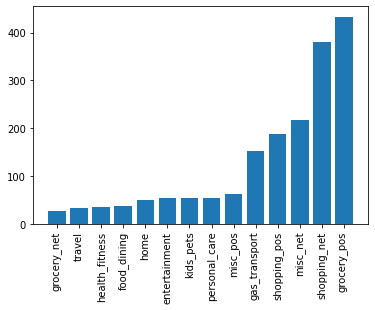

In [ ]:
plt.bar(x=is_fraud_by_cat.index,height=is_fraud_by_cat)
plt.xticks(rotation=90)
plt.show()

Total amount of transactions of frauds in each each category

In [ ]:
is_fraud_by_cat_amt=is_fraud_df.groupby('category').amt.sum().sort_values()
is_fraud_by_cat_amt

category
travel               279.81
grocery_net          343.81
health_fitness       731.91
kids_pets           1022.78
personal_care       1592.39
gas_transport       1934.87
food_dining         4456.39
home               13073.58
misc_pos           13653.11
entertainment      29452.99
grocery_pos       136494.18
shopping_pos      165742.81
misc_net          172983.82
shopping_net      381430.20
Name: amt, dtype: float64

Number of frauds per state


In [ ]:
is_fraud_by_state=is_fraud_df.groupby('state').is_fraud.sum()
is_fraud_by_state

state
AK     50
AZ     64
CA    402
CO    115
HI     16
ID     33
MO    262
NE    216
NM    121
OR    197
UT     61
WA    126
WY    119
Name: is_fraud, dtype: int64

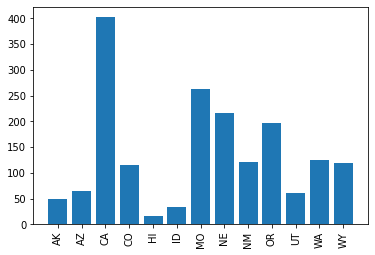

In [ ]:
plt.bar(x=is_fraud_by_state.index,height=is_fraud_by_state)
plt.xticks(rotation=90)
plt.show()

Total number of transactions per state

In [ ]:
is_fraud_per_state_tot=data.groupby('state').trans_num.count().sort_values()
is_fraud_per_state_tot

state
AK     2963
HI     3649
ID     8035
UT    15357
AZ    15362
CO    19766
NM    23427
OR    26408
WA    27040
WY    27776
NE    34425
MO    54904
CA    80495
Name: trans_num, dtype: int64

In [ ]:
is_fraud_merge=pd.merge(is_fraud_by_state,is_fraud_per_state_tot,how='inner',on='state').sort_values('is_fraud',ascending=False)
is_fraud_merge

,is_fraud,trans_num
state,,
CA,402,80495
MO,262,54904
NE,216,34425
OR,197,26408
WA,126,27040
NM,121,23427
WY,119,27776
CO,115,19766
AZ,64,15362


In [ ]:
is_fraud_rate=(is_fraud_merge.is_fraud/is_fraud_merge.trans_num).sort_values()
is_fraud_rate

state
UT    0.003972
ID    0.004107
AZ    0.004166
WY    0.004284
HI    0.004385
WA    0.004660
MO    0.004772
CA    0.004994
NM    0.005165
CO    0.005818
NE    0.006275
OR    0.007460
AK    0.016875
dtype: float64

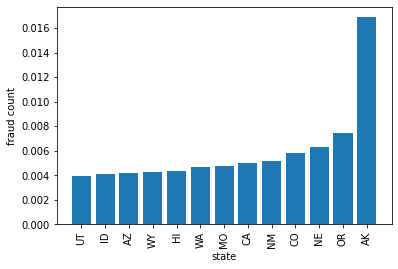

In [ ]:
plt.bar(x=is_fraud_rate.index,height=is_fraud_rate)
plt.xlabel('state')
plt.ylabel('fraud count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fraud_rate_df=pd.DataFrame(is_fraud_rate)

In [ ]:
fraud_rate_df=fraud_rate_df.reset_index()
fraud_rate_df=fraud_rate_df.rename(columns={0:'f_rate'})
fraud_rate_df

,state,f_rate
0,UT,0.003972
1,ID,0.004107
2,AZ,0.004166
3,WY,0.004284
4,HI,0.004385
5,WA,0.004660
6,MO,0.004772
7,CA,0.004994
8,NM,0.005165
9,CO,0.005818


In [ ]:
equiv = {'AK':99950, 'AZ':85001,'CA':90001,'CO':80001,'HI':96701,'ID':83201,'MO':63001,'NE':68001,'NM':87001,'OR':97001,'UT':84001,
        'WA':98001,'WY':82001}
fraud_rate_df["Zipcode"] = fraud_rate_df["state"].map(lambda x:equiv[x])
df_rate_full=pd.merge(is_fraud_merge,fraud_rate_df, how='inner',on='state')
df_rate_full=df_rate_full.rename(columns={'is_fraud':'Frauds number','trans_num':'Total transaction number','f_rate':'Fraud Rate'})
df_rate_full

,state,Frauds number,Total transaction number,Fraud Rate,Zipcode
0,CA,402,80495,0.004994,90001
1,MO,262,54904,0.004772,63001
2,NE,216,34425,0.006275,68001
3,OR,197,26408,0.007460,97001
4,WA,126,27040,0.004660,98001
5,NM,121,23427,0.005165,87001
6,WY,119,27776,0.004284,82001
7,CO,115,19766,0.005818,80001
8,AZ,64,15362,0.004166,85001
9,UT,61,15357,0.003972,84001


In [ ]:
df_rate_full.columns

Index(['state', 'Frauds number', 'Total transaction number', 'Fraud Rate',
       'Zipcode'],
      dtype='object')

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=df_rate_full['state'], # Spatial coordinates
    z = df_rate_full['Fraud Rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Emrld',
    colorbar_title = "Fraud Rate Spectrum",
    customdata=df_rate_full[['state', 'Frauds number', 'Total transaction number', 'Fraud Rate',
        'Zipcode']],
    hovertemplate='<br>'.join([
            'State: %{customdata[0]}',
            'Total Transactions: %{customdata[2]}',
            'Total Fraud Number: %{customdata[1]}',
            'Fraud Rate: %{customdata[3]:.5f}'])
))
fig.update_layout(
    title_text = 'Fraud Rate by State',
    geo_scope='usa', # limite map scope to USA
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=900)

fig.show()

Calculating age of person by providing date of birth

In [ ]:
def calculate_age(born):
  born=datetime.strptime(born,'%Y-%m-%d').date()
  today=date.today()
  return today.year-born.year-((today.month,today.day)<(born.month,born.day))

In [ ]:
data['age']=data['dob'].apply(calculate_age)

In [ ]:
data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,44
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,60
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,77
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,55
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0,83
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0,64
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,56
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,41


creating age groups

In [ ]:
bins=[10,20,30,40,50,60,70,80,90,100]
labels=[10,20,30,40,50,60,70,80,90]
data['age_group']=pd.cut(data['age'],bins=bins,labels=labels,right=False)

In [ ]:
data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age,age_group
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,44,40
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,60,60
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0,77,70
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0,55,50
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0,55,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,12.68,Wales,AK,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,65.623593,-165.186033,0,83,80
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,13.02,Greenview,CA,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,41.973127,-123.553032,0,64,60
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,56,50
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,41,40


Number of frauds per Age group

In [ ]:
is_fraud_by_age_group=data.groupby('age_group')['is_fraud'].sum()
is_fraud_by_age_group

age_group
10      0
20    167
30    317
40    299
50    381
60    290
70    107
80    162
90     59
Name: is_fraud, dtype: int64

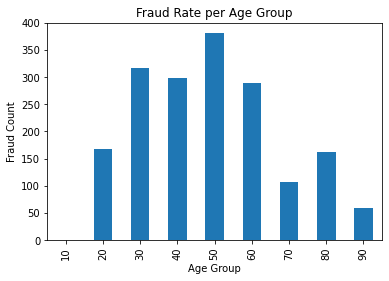

In [ ]:
is_fraud_by_age_group.plot.bar()
plt.xlabel('Age Group')
plt.ylabel('Fraud Count')
plt.title("Fraud Rate per Age Group")
plt.show()

#10. Declare Features and target

select category of merchants, amount of transaction, state of credit card holder and age of person as features and "is_fraud" column as target variable to compile the model

In [ ]:
features=data[['category','amt','state','age']]
target=data['is_fraud']

In [ ]:
print(features,target)

              category     amt state  age
0          grocery_pos  107.23    WA   44
1        entertainment  220.11    ID   60
2          grocery_pos   96.29    CA   77
3         shopping_pos    7.77    NM   55
4             misc_pos    6.85    WY   55
...                ...     ...   ...  ...
339602            home   12.68    AK   83
339603       kids_pets   13.02    CA   64
339604  health_fitness   43.77    MO   56
339605       kids_pets   86.88    WA   41
339606          travel    7.99    ID   57

[339607 rows x 4 columns] 0         0
1         0
2         0
3         0
4         0
         ..
339602    0
339603    0
339604    0
339605    0
339606    0
Name: is_fraud, Length: 339607, dtype: int64


#11. Preprocessing Dataset

Initially, create dummy vriable for features. Then split features and target into training and testing portion in the ratio of 75:25. Apply Standard Scaler to make dispersed values intoa fixed range

In [ ]:
features=pd.get_dummies(features,drop_first=True)
features.shape

(339607, 27)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=100)

In [ ]:
print(X_train.shape,X_test.shape)

(254705, 27) (84902, 27)


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#12. Compile Model

Build a Sequetial ANN Model which consists of input layer with 100 neurons, 5 hidden layers with 88,50,50,50,50 neurons respectively, all these hidden and input layer have relu as activation function and uniform kernal initializer. Output layer is constructed with sigmoid activation function. Next step is to compile the model with binary crossentropy as loss function and Adam optimizer with learning rate of 0.001 Followed by fitting the model into training portion of the dataset with 50 epochs and batch size of 200.

In [ ]:
model=Sequential()
model.add(Dense(100,input_dim=27,activation='relu',kernel_initializer='uniform'))
model.add(Dense(88,activation='relu',kernel_initializer='uniform'))
model.add(Dense(50,activation='relu',kernel_initializer='uniform'))
model.add(Dense(50,activation='relu',kernel_initializer='uniform'))
model.add(Dense(50,activation='relu',kernel_initializer='uniform'))
model.add(Dense(50,activation='relu',kernel_initializer='uniform'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 100)               2800      
                                                                 
 dense_18 (Dense)            (None, 88)                8888      
                                                                 
 dense_19 (Dense)            (None, 50)                4450      
                                                                 
 dense_20 (Dense)            (None, 50)                2550      
                                                                 
 dense_21 (Dense)            (None, 50)                2550      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 1)                

In [ ]:
training_history=model.fit(X_train,y_train,epochs=50,batch_size=200,validation_data=(X_test,y_test))

Epoch 1/50
1274/1274 [==============================] - 7s 5ms/step - loss: 0.0340 - accuracy: 0.9947 - val_loss: 0.0167 - val_accuracy: 0.9948
Epoch 2/50
1274/1274 [==============================] - 7s 5ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.0150 - val_accuracy: 0.9962
Epoch 3/50
1274/1274 [==============================] - 5s 4ms/step - loss: 0.0155 - accuracy: 0.9963 - val_loss: 0.0142 - val_accuracy: 0.9963
Epoch 4/50
1274/1274 [==============================] - 5s 4ms/step - loss: 0.0152 - accuracy: 0.9964 - val_loss: 0.0134 - val_accuracy: 0.9964
Epoch 5/50
1274/1274 [==============================] - 6s 5ms/step - loss: 0.0146 - accuracy: 0.9965 - val_loss: 0.0129 - val_accuracy: 0.9966
Epoch 6/50
1274/1274 [==============================] - 5s 4ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 0.0125 - val_accuracy: 0.9966
Epoch 7/50
1274/1274 [==============================] - 5s 4ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0107 - val_accuracy:

In [ ]:
hist=training_history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualizing training loss and Validation loss

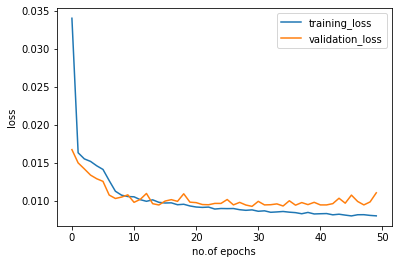

In [ ]:
plt.plot(hist['loss'],label='training_loss')
plt.plot(hist['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('loss')
plt.show()

Visualizing training accuracy and Validation accuracy

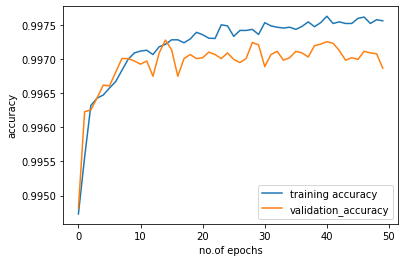

In [ ]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.xlabel('no.of epochs')
plt.ylabel('accuracy')
plt.show()

#13. Prediction & Accuracy of the Model

In [ ]:
y_pred=model.predict(X_test)

2654/2654 [==============================] - 4s 1ms/step


Converting predicted probabilities into classes

In [ ]:
y_pred_classes=(y_pred>0.5).astype('int')
y_pred_classes

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Accuracy Score, Recall Score and Precision Score

In [ ]:
print('recall score is {}'.format(recall_score(y_test,y_pred_classes)))
print('accuracy score is {}'.format(accuracy_score(y_test,y_pred_classes)))
print('precision score is {}'.format(precision_score(y_test,y_pred_classes)))

recall score is 0.7227272727272728
accuracy score is 0.9968669760429671
precision score is 0.6883116883116883


Classification report

In [ ]:
Classification_report=print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84462
           1       0.69      0.72      0.71       440

    accuracy                           1.00     84902
   macro avg       0.84      0.86      0.85     84902
weighted avg       1.00      1.00      1.00     84902



Confusion matrix

In [ ]:
Confusion_matrix=print(confusion_matrix(y_test,y_pred_classes))

[[84318   144]
 [  122   318]]


#14. Results & Conclusion

1. Visualizing the number of fraudulent transactions per categories of merchants, it is evident fraudulent transactions are most seen in grocery_pos, followed by shopping_net. Lower frauds are seen in grocery_net.
2. Number of fraudulent per State shows us CA is having high fraud rate and HI is the lowest fraud rate state.
3. Created geospatial plot to visualize the fraud rates across different states very easily.
4. Calculated age of person by Date of Birth and according to age, made Age groups and visualized through Bar Graph. From this bar graph it is clear that middle aged people (30 - 60) are more likely victim than any other groups.
5. Achieved 99% of accuracy.

